<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Arboldedecision_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A0142292
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales
* Héctor Salvador Montañez Alvarez
* Jaime Andres Palacios Campaña

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import confusion_matrix, make_scorer

# Adicionales--
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer


# **Ejercicio-1.** 

## Carga de datos

In [ ]:
# Cargamos la base de datos con los nombres de las columnnas traducidos a Inglés
# Este archivo se encuentra en nuestro repositorio github público:
# https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/SouthGermanCredit_Traducida.csv

datos = pd.read_csv("SouthGermanCredit_Translated.csv")
datos.describe()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# **Ejercicio-2.**

## Creación de la estructuras de datos de entrenamiento (_train) y prueba (_test)


In [ ]:
# Los datos de entrada son todas las columnas excepto la última
X = datos.iloc[:, :-1]
# La variable de salida se encuentra en la última columna
Y = datos.iloc[:, -1]

# Usamos la función train_test_split de la libreria sklearn
# Fijamos el generador de números aleatorios con el fin de que los conjuntos
# no cambien en cada corrida
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state=45
)

# Chequeamos el tamaño de los conjuntos obtenidos
print(X_train.shape, ": dimensión de datos de entrada de entrenamiento y validación")
print(X_test.shape, ": dimensión de datos de entrada de prueba")
print(
    Y_train.shape, ": dimensión de variable de salida para entrenamiento y validación"
)
print(Y_test.shape, ": dimensión de variable de salida para prueba")


(850, 20) : dimensión de datos de entrada de entrenamiento y validación
(150, 20) : dimensión de datos de entrada de prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


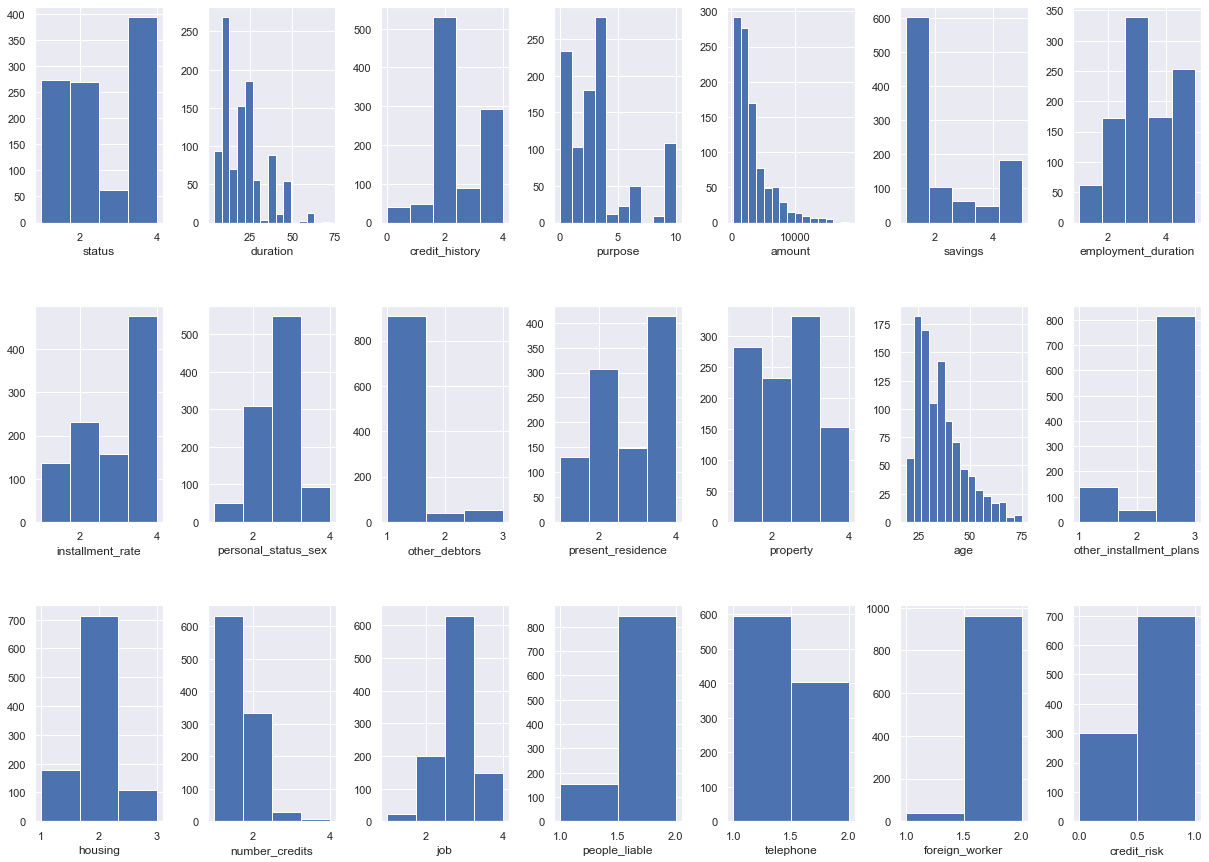

In [ ]:
# En esta sección creamos los histogramas sin transformaciones
# para darnos una idea de las distribuciones

# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (17, 12)})
# Crea el espacio de trabajo como una matriz de 3 x 7 = 21 variables
fig, axes = plt.subplots(3, 7)
# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 21):
    # Posición sequencial. Van de 1 a 21 en este caso (no 0)
    plt.subplot(3, 7, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()
    # Si el número de valores es mayor de 10, declara el número de buckets como 15
    # si es <=10 usa ese número de buckets
    if buckets > 10:
        buckets = 15
    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 21 gráficas
plt.show()


# **Ejercicio-3.**
## Primera approximación
## Transformaciones:
* categórica (categorical),
* ordinal (discretized quantitative),
* numérica (quantitative), y 
* binaria (binary).


In [ ]:
#Chequeamos si existen datos nulos. No esperamos ninguno ya que la base de datos
#que estamos usando ya ha sido limpiada anteriormente
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [ ]:
datos


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
# imputacion por moda - Categóricos
datos_cat = [
    "status",
    "credit_history",
    "purpose",
    "savings",
    "personal_status_sex",
    "other_debtors",
    "other_installment_plans",
    "housing",
]

# imputacion por moda - Ordinales
datos_ord = [
    "employment_duration",
    "installment_rate",
    "present_residence",
    "property",
    "number_credits",
    "job",
]

# imputacion por media/mediana - Numéricos
datos_num = ["duration", "amount", "age"]

# imputacion por moda - Binarios
datos_bin = ["people_liable", "telephone", "foreign_worker", "credit_risk"]


In [ ]:
datos[datos_bin]


,people_liable,telephone,foreign_worker,credit_risk
0,2,1,2,1
1,1,1,2,1
2,2,1,2,1
3,1,1,1,1
4,2,1,1,1
...,...,...,...,...
995,1,1,2,0
996,2,1,2,0
997,2,2,2,0
998,2,2,2,0


In [ ]:

# Observación de los valores únicos en todas las columnas.
# Comparamos con los valores registrados en el archivo fuente "codetable.txt"
# con el fin de asegurarnos de que no haya valores en los datos que no estén
# documentados en el mencionado archivo fuente.
# Resultado negativo, lo cual es bueno. Todos los valores usados en los datos
# están referenciados en la en archivo fuente "codetable.txt".
for v in datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")


status
[1 2 4 3]
-----
duration
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
-----
credit_history
[4 2 3 0 1]
-----
purpose
[ 2  0  9  3  1 10  5  4  6  8]
-----
amount
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  2603   936  3062
  4795  5842  2063  1459  1213  5103   874  

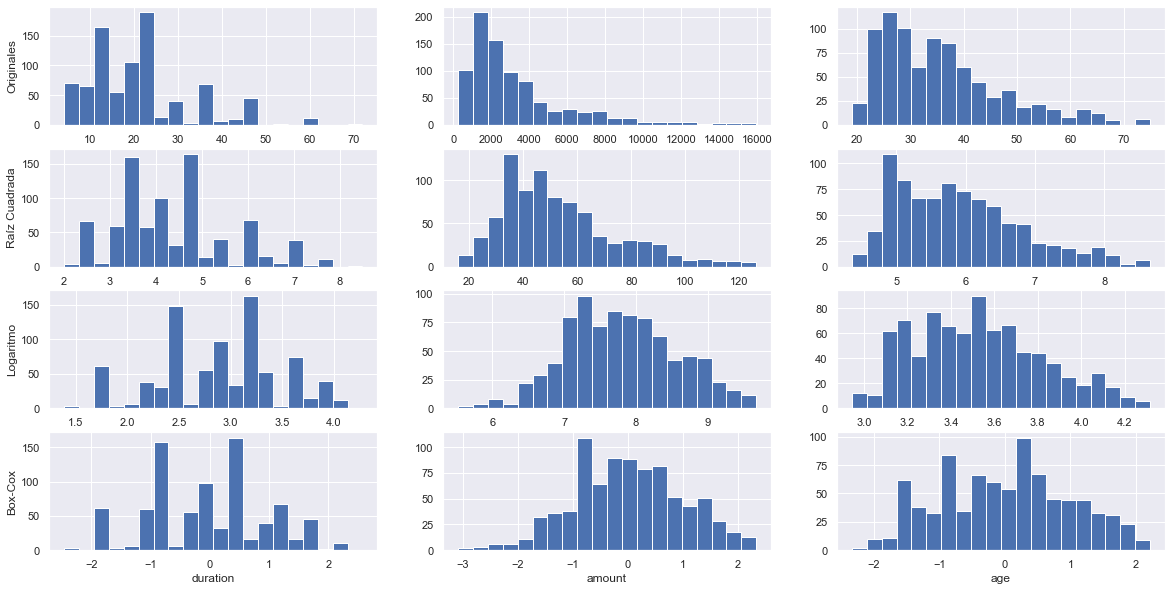

In [ ]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar 
# cual daría la mejor simetria pos-transformación.

sns.set(rc={"figure.figsize": (20, 10)})
fig, axes = plt.subplots(3, 3)

for k in range(0, 3):

    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 3, k + 1)
    Transf0 = (
        X_train[datos_num].iloc[:, k].to_numpy().reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(4, 3, k + 4)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(4, 3, k + 7)
    Transf2 = np.log(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(4, 3, k + 10)
    Transf4 = power_transform(
        (X_train[datos_num[k]]).values.reshape(-1, 1), method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Box-Cox")


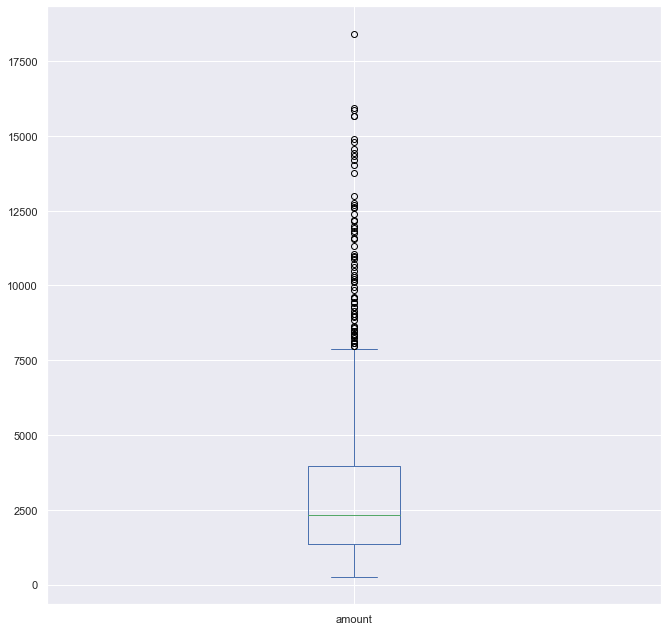

In [ ]:
datos["amount"].plot(kind="box", layout=(1,4), figsize=(11,11),sharex=False,sharey=False) 
plt.show()


<AxesSubplot:>

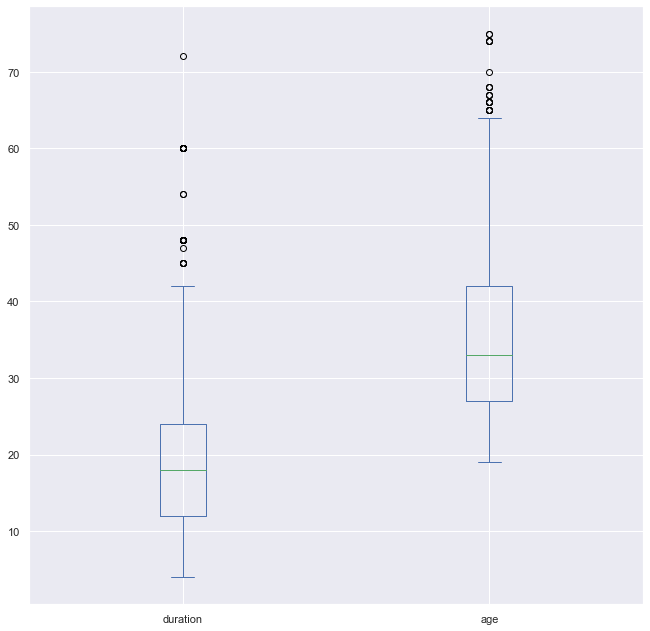

In [ ]:
datos[["duration", "age"]].plot(kind="box", layout=(1,4), figsize=(11,11),sharex=False,sharey=False) 


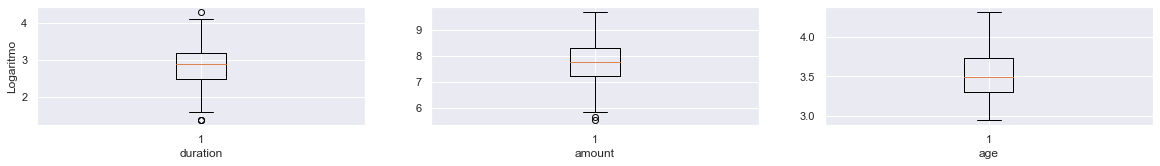

In [ ]:
for k in range(0, 3):
    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 3, k + 1)
    Transf0 = (
        X_train[datos_num].iloc[:, k].to_numpy().reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    Transf2 = np.log(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.boxplot(Transf2)
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Logaritmo")


In [ ]:
datos.isnull().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
# Transformaciones a factores categóricos y binarios de entrada:
cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(drop="first")),
    ]
)
cat_pipeline_nombres = [
    "status",
    "credit_history",
    "purpose",
    "savings",
    "personal_status_sex",
    "other_debtors",
    "other_installment_plans",
    "housing",
]
bin_pipeline_nombres = ["people_liable", "telephone", "foreign_worker"]


# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(np.log)),
        ("escalaNum", MinMaxScaler()),
    ]
)
num_pipeline_nombres = ["duration", "amount", "age"]


# Transformaciones a factores ordinales de entrada:
ord_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = [
    "employment_duration",
    "installment_rate",
    "present_residence",
    "property",
    "number_credits",
    "job",
]


# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres+bin_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
        ("ordpipe", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)


# **Ejercicio-4.**
## Entrenamiento usando validación cruzada
## Modelos:
* Regresión Logística, 
* Árbol de Decisión, y 
* Bosque Aleatorio.


In [ ]:
def get_models():
    modelos = list()
    nombres = list()

    # LR - Regresión Logística:
    modelos.append(LogisticRegression())
    nombres.append("LR")

    # DT - Árbol de Decisión:
    modelos.append(DecisionTreeClassifier())
    nombres.append("DT")

    # RF - Random Forest:
    modelos.append(RandomForestClassifier())
    nombres.append("RF")

    return modelos, nombres


In [ ]:
# Funciones para generar scores
def accuracy(yreal, ypred):
    score = (yreal == ypred).mean()
    return score


def precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1] / tot
    vp = cm[1, 1] / tot

    score = vp / (vp + fp)

    return score


def recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fn = cm[1, 0] / tot
    vp = cm[1, 1] / tot

    score = vp / (vp + fn)

    return score


def f1(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1] / tot
    fn = cm[1, 0] / tot
    vp = cm[1, 1] / tot

    score = 2 * vp / (2 * vp + fp + fn)

    return score


def gmean(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vn = cm[0, 0] / tot
    fp = cm[0, 1] / tot
    fn = cm[1, 0] / tot
    vp = cm[1, 1] / tot

    recall = vp / (vp + fn)
    specifity = vn / (vn + fp)

    score = np.sqrt(recall * specifity)

    return score


In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", modelos[i])])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    metricas = {
        "accuracy": make_scorer(accuracy),
        "precision": make_scorer(precision),
        "recall": make_scorer(recall),
        "f1": make_scorer(f1),
        "gmean": make_scorer(gmean),
    }

    scores = cross_validate(
        pipeline, X_train, Y_train, scoring=metricas, cv=cv
    )

    resultados.append(scores)
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_f1']),
                                                                          np.std(scores['test_f1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),
                                                                          ))


C:\Users\Walt\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Walt\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

LR:
mean Accuracy: 0.748 (0.0251)
mean Precision: 0.786 (0.0220)
mean Recall: 0.880 (0.0283)
mean F1-score: 0.830 (0.0172)
Gmean: 0.621 (0.0510)

DT:
mean Accuracy: 0.668 (0.0314)
mean Precision: 0.767 (0.0229)
mean Recall: 0.755 (0.0454)
mean F1-score: 0.760 (0.0268)
Gmean: 0.592 (0.0394)

RF:
mean Accuracy: 0.740 (0.0257)
mean Precision: 0.767 (0.0232)
mean Recall: 0.903 (0.0229)
mean F1-score: 0.829 (0.0160)
Gmean: 0.568 (0.0613)



#**Ejercicio-5.**
#Mejoramiento de los hiperparámetros y sobreentrenamiento



In [ ]:
None


#**Ejercicio-6.**
#Obtención de los modelos finales


In [ ]:
None


#**Bibliografía**

Sadangi, S., (21 de Julio de 2022). How to Deal With Files in Google Colab: Everything You Need to Know. *Neptune Labs.* https://neptune.ai/blog/google-colab-dealing-with-files

###**Fin de la Actividad de la semana 6.**